In [1]:
%run ../common_functions/import_all.py

import cv2

from common_functions.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# The intensity histogram

### Read image, see its features

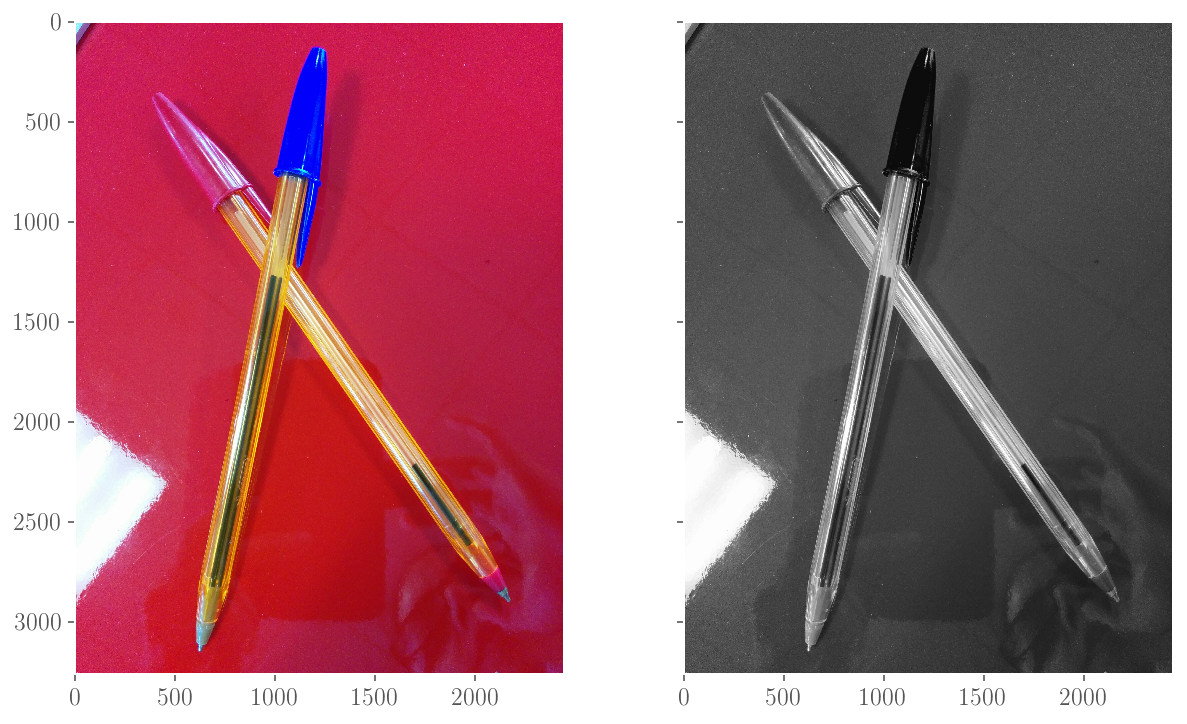

In [2]:
# First read an image
image = cv2.imread('pens.jpg')

# Transform into grayscale and into RGB (for Matplotlib)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
RGB_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show them both
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.grid()
ax1.imshow(RGB_image)

plt.gray()
ax2.grid()
ax2.imshow(gray)

plt.savefig('cv-pens.png', dpi=200)
plt.show();

In [39]:
# See image size and number of pixels

'Num of pixels',  image.size
'Size', image.shape

('Num of pixels', 23970816)

('Size', (3264, 2448, 3))

### Calculate and plot intensity histograms

In [8]:
# Hist of the gray image: channel 0, no mask, 256 pixels, range (0, 256)
gray_hist = cv2.calcHist([gray], [0], None, [256], (0, 256))  # the method can do multiple images at a time

# Hists of the color image, each channel, same args
R_hist = cv2.calcHist([RGB_image], [0], None, [256], (0, 256))
G_hist = cv2.calcHist([RGB_image], [1], None, [256], (0, 256))
B_hist = cv2.calcHist([RGB_image], [2], None, [256], (0, 256))

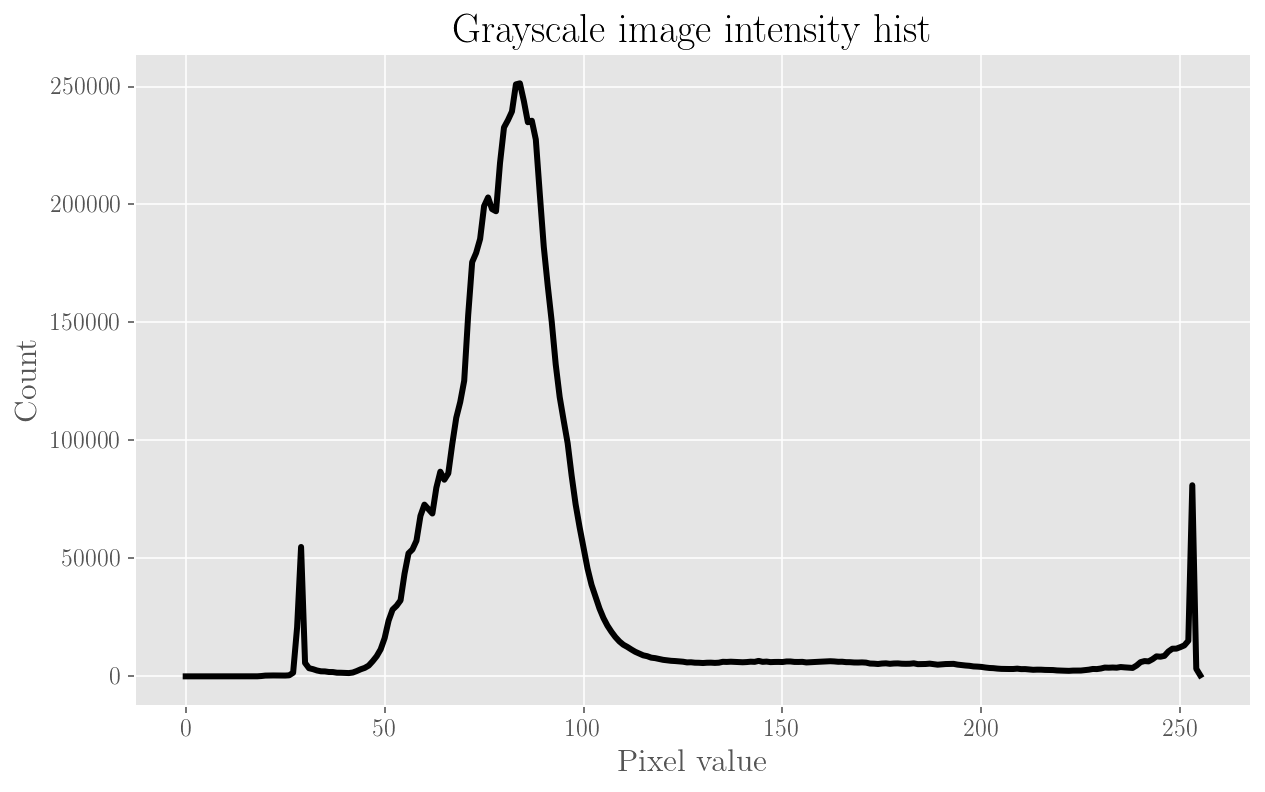

In [10]:
# Plot of the grayscale image hist
plt.plot(gray_hist, c='k')
plt.title('Grayscale image intensity hist')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.show();

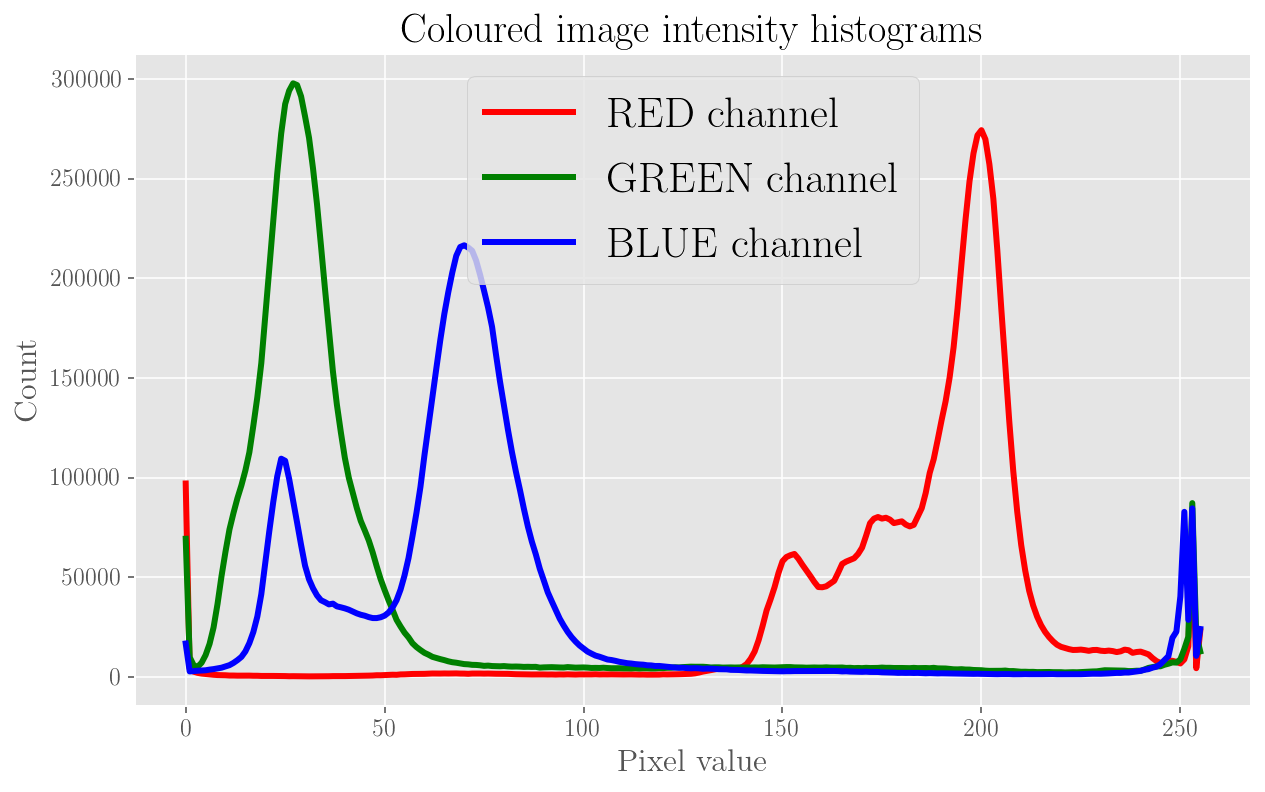

In [11]:
# Plot of the RGB image hists
plt.plot(R_hist, c='r', label='RED channel')
plt.plot(G_hist, c='g', label='GREEN channel')
plt.plot(B_hist, c='b', label='BLUE channel')

plt.title('Coloured image intensity histograms')
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.legend()
plt.savefig('ih-rgb.png', dpi=200)
plt.show();

## Histogram equalisation

In [3]:
# equalise
gray_eq = cv2.equalizeHist(gray)

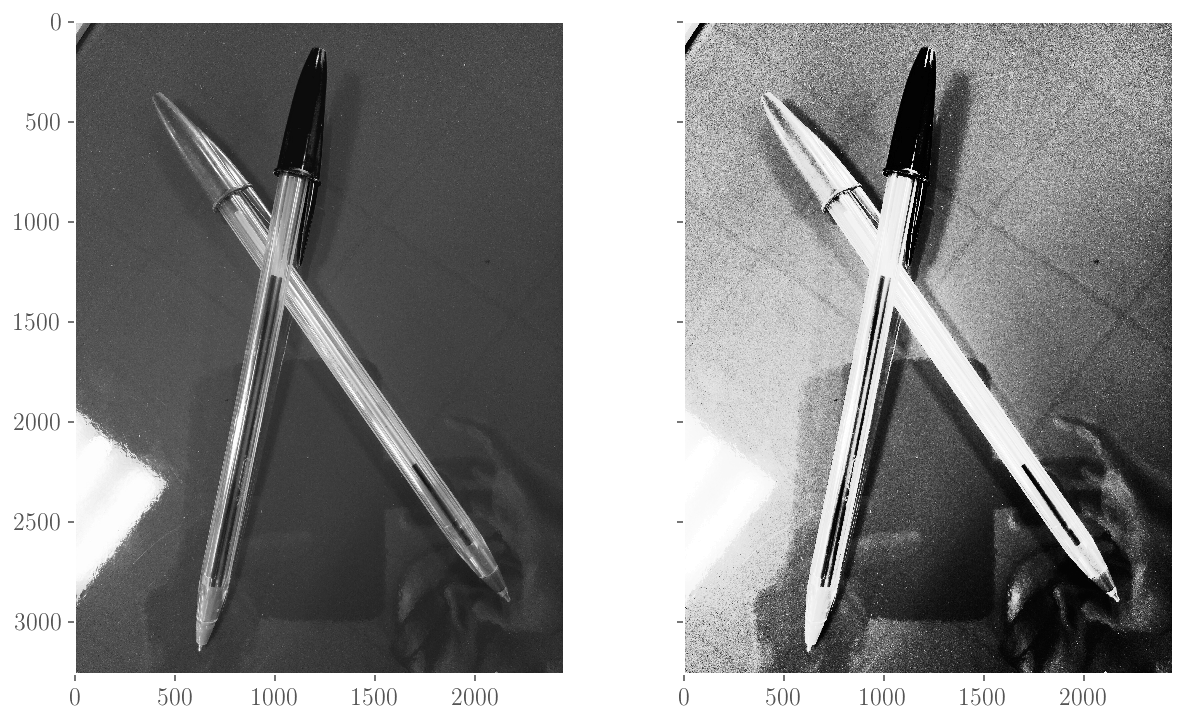

In [4]:
# Plot both gray image and equalised

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.grid()
ax1.imshow(gray)

ax2.grid()
ax2.imshow(gray_eq)

plt.savefig('pens-equalised.png', dpi=200)
plt.show();